<p1>Import the package and the dataframe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy
import pylab
# path_to_data = './data/'
# training = pd.read_csv(path_to_data + 'training_set.csv', sep=',', header=0)
# test = pd.read_csv(path_to_data + 'test_set.csv', sep=',', header=0)
# training_info = pd.read_csv(path_to_data + 'training_info.csv', sep=',', header=0)
# test_info = pd.read_csv(path_to_data + 'test_info.csv', sep=',', header=0)
from collections import Counter

<p1>A function which check the amount of mails and senders

In [3]:
def check_info_set(info_filename,set_filename):
    training_info = pd.read_csv(training_info_filename, sep=',', header=0)
    training = pd.read_csv(training_set_filename, sep=',', header=0)

    mailIds2 = []
    for mails in training['mids'].tolist():
        mails = mails.split(' ')
        mailIds2.append(mails)
    print "%d senders,correct!"%len(mailIds2) if len(mailIds2)==125 else "Sender(s) missing"

    mailIds2 = [int(mail) for sublist in mailIds2 for mail in sublist]

    print "There is %d mails in training_set"%len(mailIds2)

    print "There is %d mails in training_info"%len(training_info['mid'].tolist())

    print "Checked, they are in Bijection" if set(mailIds2)==set(training_info['mid'].tolist()) else "Not the same"

<p1> A function who generate new info and set which include the mails most recently

In [4]:
def get_most_recently_mail(traing_info_filename,training_set_filename,most_recently=1000):
    mid_date = pd.read_csv(training_info_filename, sep=',', header=0)
    mid_date = training_info.drop(['body','recipients'], 1)
    
    training_set = pd.read_csv(training_set_filename, sep=',', header=0)

    for index,serie in training_set.iterrows():
        row = serie.tolist()
        mids = row[1].split(" ")
        mids = [int(x) for x in mids]
        cache = mid_date['mid'].tolist()
        cache = [int(x) for x in cache if x in mids]
        if len(cache)>most_recently:
            cache = cache[:most_recently]

        midStr = ' '.join(str(x) for x in cache)
        training_set['mids'].iloc[index] = midStr

    training_info = pd.read_csv(training_info_filename, sep=',', header=0)

    allMids = []
    for index,serie in training_set.iterrows():
        row = serie.tolist()
        mids = row[1].split(" ")
        allMids.append(mids)

    allMids = [int(x) for sublist in allMids for x in sublist]
    training_info = training_info[training_info['mid'].isin(allMids)]
    
    
    return training_info,training_set

<p1>A function who plot a histogram to present the frequency of mails by date in the file training_info

In [24]:
def count_by_date(training_info_filename):
    training_info = pd.read_csv(training_info_filename, sep=',', header=0)
    training_info.date = training_info.date.astype("datetime64[ns]")
    training_info['date'].groupby([training_info.date.dt.year,training_info.date.dt.month]).count().plot.bar()
    plt.show()

<p2>Merge training_info and training_set into one file

In [ ]:
# training_info_filename = '../data/training_info_clean.csv'
# training_set_filename = '../data/training_set_clean.csv'

# training_info = pd.read_csv(training_info_filename, sep=',', header=0)
# training = pd.read_csv(training_set_filename, sep=',', header=0)

# sender_list = []
# for index,serie in training_info.iterrows():
#     row = serie.tolist()
#     mid = int(row[0])
#     for index,serie in training.iterrows():
#         row2 = serie.tolist()
#         sender_name = row2[0]
#         ids = row2[1].split(" ")
#         ids = [int(x) for x in ids]
#         if mid in ids:
#             sender_list.append(sender_name)

# print len(sender_list)
# print len(training_info.mid.tolist())

In [14]:
sender_count = Counter(sender_list)

In [7]:
training_info_filename = '../data/training_info_clean.csv'
training_set_filename = '../data/training_set_clean.csv'
check_info_set(training_info_filename,training_set_filename)

125 senders,correct!
There is 43411 mails in training_set
There is 43411 mails in training_info
Checked, they are in Bijection


In [16]:
training_set_filename = '../data/training_set_clean.csv'
training = pd.read_csv(training_set_filename, sep=',', header=0)

list_sender = []
list_mid = []

for index,serie in training.iterrows():
    row = serie.tolist()
    sender = row[0]
    ids = row[1].split(" ")
    ids = [int(x) for x in ids]
    for mid in ids:
        list_sender.append(sender)
        list_mid.append(mid)

merge_train = pd.DataFrame({"sender":list_sender, "mid":list_mid})

print merge_train.head(10)
print len(merge_train.mid.tolist())



      mid                   sender
0  158713  karen.buckley@enron.com
1  158697  karen.buckley@enron.com
2  200301  karen.buckley@enron.com
3  158679  karen.buckley@enron.com
4  278595  karen.buckley@enron.com
5  298162  karen.buckley@enron.com
6  200215  karen.buckley@enron.com
7  256957  karen.buckley@enron.com
8  256959  karen.buckley@enron.com
9  268323  karen.buckley@enron.com
43411


In [17]:
training_info_filename = '../data/training_info_clean.csv'
training_info = pd.read_csv(training_info_filename, sep=',', header=0)

merge_train = pd.merge(merge_train,training_info)

AttributeError: mids

In [19]:
print len(merge_train.mid.tolist())

43411


In [23]:
mids = merge_train.mid.tolist()
print len(Counter(mids))

43411


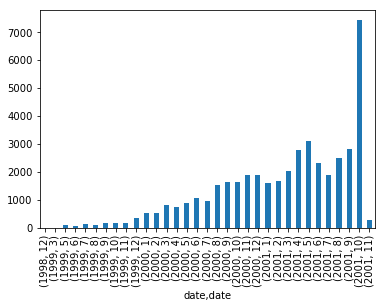

In [26]:
count_by_date('../data/merge_train.csv')